Title: **Predicting Newsletter Subscription based on Player Characteristics**

Author: Helena Wu 

Student Number: 73311193

**Introduction**

The UBC Computer Science research team is running a Minecraft server to study how people interact within digital environments. To grow their research efforts, the team is interested in understanding what kinds of players are more likely to subscribe to their game-related newsletter. This insight will help them better target recruitment and engagement strategies. The question this report aims to study is: Can player characteristics and gameplay behaviour (such as experience level, playtime, age, and session activity) predict whether a player will subscribe to a game-related newsletter?

The analysis within this report uses two datasets:
`players.csv` and `sessions.csv`.

The `players.csv` dataset contains observations from 196 players and includes information such as name, hashed email, gender, age, experience level and whether the player subscribed.

**Variables within the players.csv dataset**:
  | Variable        | Type    | Description|
  |-----------------|---------|------------|
  | experience      | Categorical  | Player’s self-described skill level |
  | subscribe       | Logical      | If the player subscribed to the newsletter or not|
  | hashedEmail     | Character    | Player identifier |
  | played_hours    | Numeric      | Player’s total hours played |
  | name            | Character    | Player’s chosen in-game name |
  | gender          | Categorical  | Gender ( Male, Female, Other)|
  | Age             | Numeric      | Age in years |

The `sessions.csv` dataset contains 1535 play session records, such as start and end times.
**Variables within the sessions.csv dataset**:
  | Variable             | Type    | Description |
  |----------------------|---------|-------------|
  | hashedEmail          | Character  | Player identifier|
  | start_time           | Character  | Start timestamp|
  | end_time             | Character  | End timestamp|
  | original_start_time  | Numeric    | Start time in milliseconds|
  | original_end_time    | Numeric    | End time in milliseconds|


Libraries:

In [2]:
#please run the code below to attach the following libraries
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 10)
library(lubridate)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Loading the Data:

In [3]:
players_data <- read_csv("data/players.csv") 
sessions_data <- read_csv("data/sessions.csv")

players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,10/05/2024 23:01,10/05/2024 23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12


Processing the Data :
After loading the data, we can see the following issues within the data that need to be fixed:
- the 'hashedEmail' column should be removed to preserve anonymity (but is needed to join 'players.csv' and 'sessions.csv' tables together.
- some session_count observations data is missing (these are excluded from the analysis)
- Session timestamps are in milliseconds and need to be converted

Additioanlly, we need to calculate the following variables:
 | Derived Variable      | Type    | Description|
|------------------------|---------|--------    |
| session_count         | Numeric | Number of sessions per player|
| total_session_duration    | Numeric | Sum of all session durations per player|

**Wrangling**

To answer the question if player characteristics and gameplay behaviour can predict whether a player will subscribe to a newsletter, we want to summarize the sessions data to find useful player behaviors such as session count and total play time.

In [74]:
sessions_data_clean <- sessions_data |>
separate(start_time, into = c("start_date", "start_clock_time"), sep = " ") |>
separate(end_time, into = c("end_date", "end_clock_time"), sep = " ") |>
  mutate(start_date = dmy(start_date),
    end_date = dmy(end_date)) |>
group_by(hashedEmail)

sessions_data_clean

hashedEmail,start_date,start_clock_time,end_date,end_clock_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,18:12,2024-06-30,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,23:33,2024-06-17,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,17:34,2024-07-25,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25,03:22,2024-07-25,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25,16:01,2024-05-25,16:12,1.71665e+12,1.71665e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-10,23:01,2024-05-10,23:07,1.71538e+12,1.71538e+12
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,2024-07-01,04:08,2024-07-01,04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28,15:36,2024-07-28,15:57,1.72218e+12,1.72218e+12




**Merging and Cleaning Player Data:**
- the `sessions_data_clean` and `players_data` datasets are merged
- `na`'s are dropped and not included within the dataset
- hashed_email and name is removed to remove player identifiers
- `original_start_time` and	`original_end_time` is removed and not used within the analysis because measurement units are unknown
- adjusted the `subscribe` column to answer either YES or NO (rather than TRUE or FALSE) for clarification
- Mutate subscribe to be a factor

In [119]:
merged_data <- players_data |>
left_join(sessions_data_clean, by = "hashedEmail") |>
clean_names() |>
drop_na(experience:original_end_time) |>
filter(played_hours > 0) |>
  select(-hashed_email, -name, -original_start_time, -original_end_time) |>
mutate(subscribe = recode(as.character(subscribe), `TRUE` = "YES", `FALSE` = "NO")) |>
mutate(subscribe = factor(subscribe, levels= c("NO", "YES")))
merged_data

experience,subscribe,played_hours,gender,age,start_date,start_clock_time,end_date,end_clock_time
<chr>,<fct>,<dbl>,<chr>,<dbl>,<date>,<chr>,<date>,<chr>
Pro,YES,30.3,Male,9,2024-08-08,00:21,2024-08-08,01:35
Pro,YES,30.3,Male,9,2024-09-09,22:30,2024-09-09,22:37
Pro,YES,30.3,Male,9,2024-08-08,02:41,2024-08-08,03:25
Pro,YES,30.3,Male,9,2024-09-10,15:07,2024-09-10,15:29
Pro,YES,30.3,Male,9,2024-05-05,22:21,2024-05-05,23:17
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,NO,2.3,Male,17,2024-09-08,20:04,2024-09-08,22:02
Amateur,NO,2.3,Male,17,2024-08-23,21:59,2024-08-23,22:06
Amateur,NO,2.3,Male,17,2024-09-09,02:17,2024-09-09,02:45


**Data Analysis:** #RETURN TO THIS AND WRITE DESCRIPTION

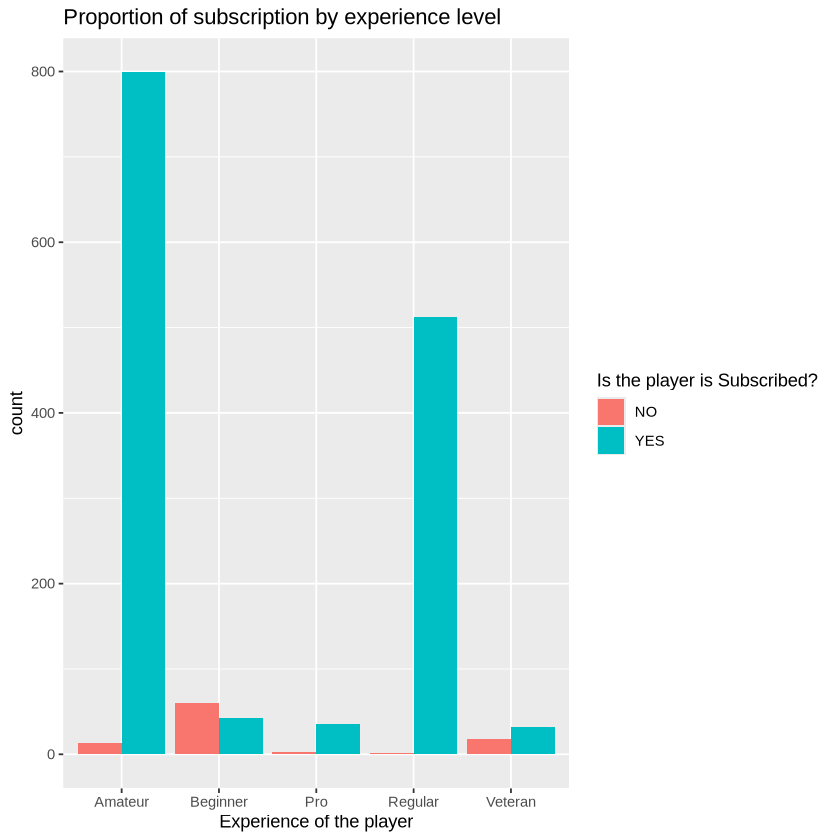

In [120]:
experience_plot <- merged_data |>
ggplot(aes(x=experience, fill = subscribe)) +
geom_bar(position = position_dodge()) +
labs(fill = "Is the player is Subscribed?") +
xlab("Experience of the player") + 
ggtitle("Proportion of subscription by experience level")

experience_plot

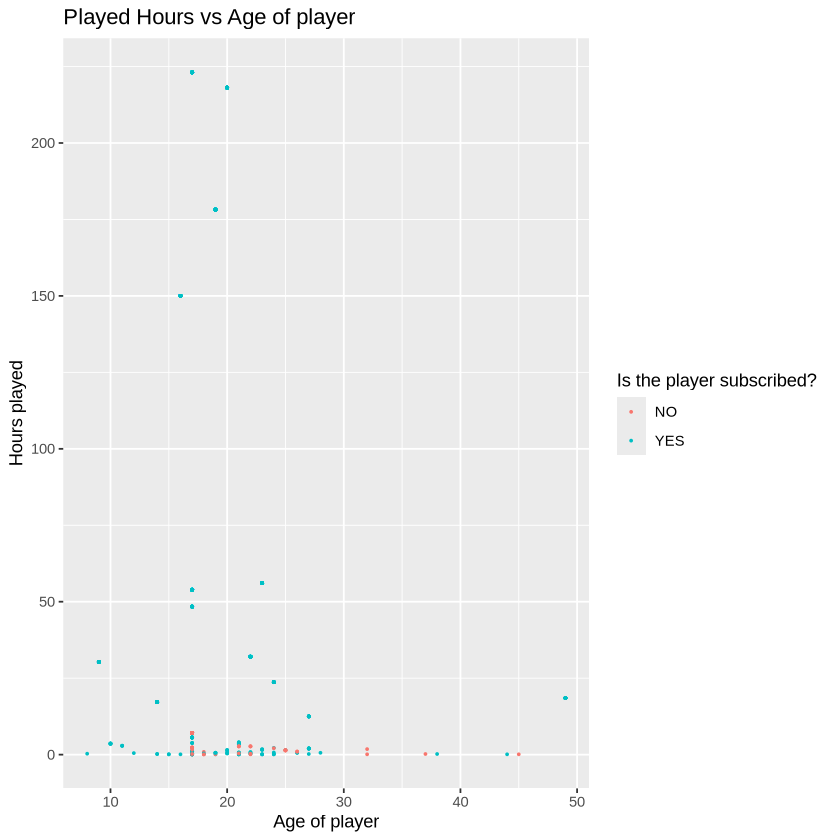

In [121]:
hours_played_plot <- ggplot(merged_data, aes(x = age, y = played_hours, color = subscribe)) +
  geom_point(size = 0.4) +
xlab("Age of player") +
ylab("Hours played") +
labs(color = "Is the player subscribed?") +
ggtitle("Played Hours vs Age of player")
hours_played_plot

**Modelling with KNN Classification**

Using cross validation to test for K.

In [122]:
set.seed(1)

minecraft_folds <- merged_data |>
vfold_cv(v=5, strata=subscribe)

knn_model <- nearest_neighbor(neighbors = tune(), weight_func = "rectangular") |>
  set_engine("kknn") |>
  set_mode("classification")


subscribe_recipe <- recipe(subscribe ~ age + played_hours + experience, data = merged_data) |>
step_dummy(all_nominal_predictors()) |>
step_scale(all_predictors()) |>
step_center(all_predictors())


knn_workflow <- workflow() |>
  add_recipe(subscribe_recipe) |>
  add_model(knn_model)

neighbor_grid <- tibble(neighbors = 1:10)

knn_tune <- knn_workflow |>
tune_grid(resamples = minecraft_folds, grid = neighbor_grid, metrics = metric_set(accuracy))

knn_tune |> 
collect_metrics() |>
filter(.metric == "accuracy") |>
arrange(desc(mean))

knn_tune

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9874826,5,0.002627245,Preprocessor1_Model01
2,accuracy,binary,0.9868247,5,0.002937347,Preprocessor1_Model02
3,accuracy,binary,0.9855003,5,0.001674363,Preprocessor1_Model03
4,accuracy,binary,0.9855003,5,0.001674363,Preprocessor1_Model04
5,accuracy,binary,0.9802241,5,0.002327601,Preprocessor1_Model05
6,accuracy,binary,0.9802241,5,0.002327601,Preprocessor1_Model06
7,accuracy,binary,0.9802219,5,0.001808722,Preprocessor1_Model07
8,accuracy,binary,0.9802219,5,0.001808722,Preprocessor1_Model08
9,accuracy,binary,0.9663779,5,0.005852174,Preprocessor1_Model09


Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
Warning message:
“`optional` is kept for consistency with the underlying class but TRUE values will be ignored.”
ERROR while rich displaying an object: Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE, : arguments imply differing number of rows: 1213, 1214

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)


Choosing K:
By looking at the `knn_tune` table, we can see that while the best performing model used K=1 (achieving an accuracy of 0.9878), the better choice would be K=3 because although it has a slightly lower accuracy of (0.9855) the variance is much lower (std_err = 0.0017).

In [123]:
set.seed(1)

knn_fit <- fit(knn_workflow, data = train_data)

predictions <- knn_fit |>
predict(test_data, type = "prob") |>
bind_cols(predict(knn_fit, test_data)) |>
bind_cols(test_data)

predictions

Warning message:
“tune samples were requested but there were 1137 rows in the data. 1132 will be used.”


.pred_NO,.pred_YES,.pred_class,experience,subscribe,played_hours,gender,age,start_date,start_clock_time,end_date,end_clock_time,original_start_time,original_end_time
<dbl>,<dbl>,<fct>,<chr>,<fct>,<dbl>,<chr>,<dbl>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
0.06183746,0.9381625,YES,Pro,YES,30.3,Male,9,2024-09-09,22:30,2024-09-09,22:37,1.72592e+12,1.72592e+12
0.06183746,0.9381625,YES,Pro,YES,30.3,Male,9,2024-04-06,22:24,2024-04-06,23:33,1.71244e+12,1.71245e+12
0.06183746,0.9381625,YES,Pro,YES,30.3,Male,9,2024-08-03,02:30,2024-08-03,03:54,1.72265e+12,1.72266e+12
0.06183746,0.9381625,YES,Pro,YES,30.3,Male,9,2024-04-08,01:17,2024-04-08,01:43,1.71254e+12,1.71254e+12
0.06183746,0.9381625,YES,Pro,YES,30.3,Male,9,2024-09-09,22:51,2024-09-10,00:40,1.72592e+12,1.72593e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.06183746,0.9381625,YES,Regular,NO,0.1,Male,18,2024-06-29,21:05,2024-06-29,21:15,1.71970e+12,1.71970e+12
0.06183746,0.9381625,YES,Veteran,YES,0.1,Female,44,2024-04-24,00:18,2024-04-24,00:29,1.71392e+12,1.71392e+12
0.06183746,0.9381625,YES,Amateur,NO,2.3,Male,17,2024-09-08,20:04,2024-09-08,22:02,1.72583e+12,1.72583e+12


In [125]:
acc_result <- predictions |>
mutate(subscribe = factor(subscribe),
       .pred_class = factor(.pred_class, levels = levels(subscribe)))

metrics <- metric_set(accuracy, precision, recall)

results <- accuracy(acc_result, truth = subscribe, estimate = .pred_class)
print(accuracy_result)

# A tibble: 1 × 3
  .metric  .estimator .estimate
  <chr>    <chr>          <dbl>
1 accuracy binary         0.636
